In [22]:
#Importing the needed packages
import scipy as sp
from scipy import stats
from scipy import integrate   # not included in basic scipy

import matplotlib.pyplot as plt
# ML finds plots too big, thus the customizations:
plt.rcParams['figure.figsize'] = (6,4.5) # Change default size of plots
plt.rcParams['font.size'] = 14           # Change default fontsize for figures
plt.rcParams['figure.autolayout'] = True # Adjusts for changes

# puts figures in the  notebook.
%matplotlib notebook   

In [24]:
#Defining equation for SHM in system of equations
#Note that time is in units of w^(-1) to work with dimensionless variables
def shm(u,t):
    x = u[0]
    v = u[1]
    return (v,-x)

In [25]:
#Defining initial conditions and parameters
E_tot = 10 #Will become random energy generated from boltzmann dist
k = 0.5
m = 2
phi = sp.stats.uniform.rvs(size=1)*2*sp.pi #choose a random phase
#Creates initial conditions given phase and parameters
x0 = (2*E_tot/k)**(1/2) * sp.cos(phi)
v0 = (2*E_tot/m)**(1/2) * sp.sin(phi)
u0 = sp.array([sp.asscalar(x0),sp.asscalar(v0)])
print(u0)

[-2.412664    2.92314268]


In [26]:
#Defining the time interval I want this to take place over
#Getting the integration into an array
t = sp.linspace(0,20,201)  # NOTE: The  points selected for plotting are 
                           # not the points used for the numerical 
                           # evalution.
x, v = sp.integrate.odeint(shm,u0,t).T

<IPython.core.display.Javascript object>


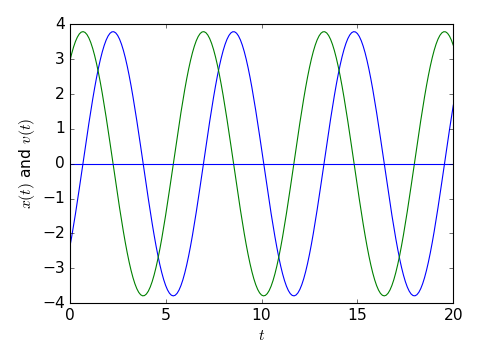

In [27]:
#Plot velocity and position vs time
plt.figure(1)
plt.plot(t,x);
plt.plot(t,v);
plt.axhline(0)
plt.xlabel("$t$")
plt.ylabel("$x(t)$ and $v(t)$")

In [29]:
#Check to make sure equal to u0
print([x[0],v[0]])

[-2.4126639974447843, 2.9231426767878506]


In [30]:
#Calculating energy at each time step
for i in range (0,201):
    Energy = 1/2*m*v[i]**2 + 1/2*k*x[i]**2
    print(Energy)

10.0
11.0304853198
11.9791669288
12.8082242322
13.4846051517
13.9813446852
14.2786393471
14.3646368862
14.2359090995
13.8975876881
13.3631604978
12.6539334858
11.7981812941
10.8300200627
9.78804732457
8.71380325086
7.65011457965
6.63938717672
5.72191556054
4.93427644612
4.30787052372
3.8676706098
3.63122609088
3.60796326637
3.7988095535
4.19615651492
4.78416317276
5.53938756666
6.43172127814
7.42558978094
8.48137067558
9.55697330379
10.6095167683
11.5970395032
12.4801720924
13.2237068319
13.7980013369
14.1801603004
14.3549482502
14.3153969293
14.0630831826
13.6080659385
12.96848527
12.1698392264
11.2439672946
10.2277810901
9.16179276296
8.08849988577
7.05069126645
6.08974106261
5.243959325
4.54706470711
4.0268401928
3.70402549724
3.59149022514
3.69372080348
4.00664162085
4.51777751378
5.20675110936
6.04609520645
7.00234779356
8.03738610707
9.1099464335
10.1772691783
11.196803552
12.1279039008
12.9334502691
13.5813280499
14.0457084048
14.3080779099
14.3579767163
14.193415536
13.82095490